In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers, regularizers
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [2]:
# Load dataset
data = pd.read_csv('boston_housing_prices.csv')

X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
def build_enhanced_model():
    model = models.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))  # Input layer
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1))  # Output layer with no activation function
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model = build_enhanced_model()

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

In [ ]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error on test data: {test_mae_score}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


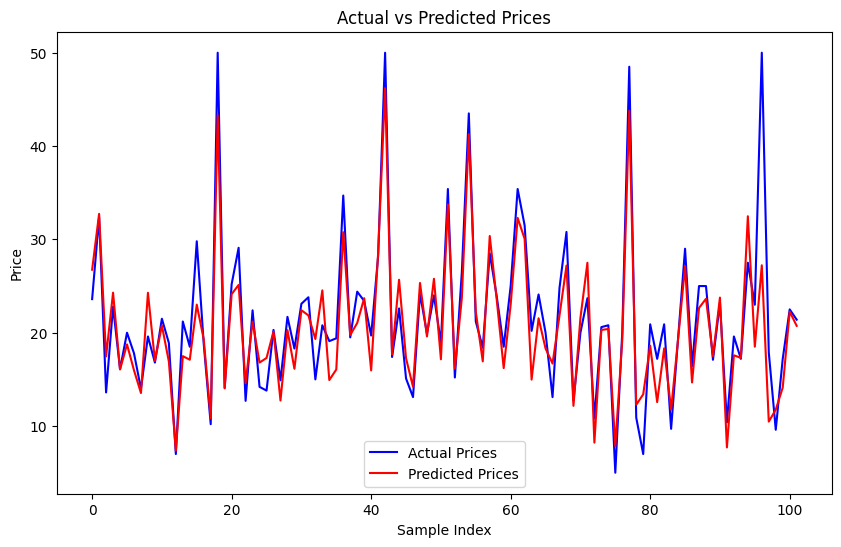

In [6]:
predictions = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()